In [1]:
%matplotlib notebook

from matplotlib import pylab
from matplotlib.cm import colors
from mpl_toolkits.mplot3d import axes3d
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import numpy as np

pylab.rcParams['figure.figsize'] = (10., 10.)

In [2]:
# Generate some fake data

def sigmoid(t):
    return 1./(1 + np.exp(-t))

N = 1800
D = 2
C = 3
X = np.zeros([N, D])
y = np.zeros(N)
X[:N//3] = np.random.randn(N//3, D) - np.array([1, 1])
X[N//3:-N//3] = np.random.randn(N//3, D) + np.array([1, 1])
X[-N//3:] = np.random.randn(N//3, D) + np.array([2, -2])
y[:N//3] = 0
y[N//3:-N//3] = 1
y[-N//3:] = 2

lr = LogisticRegression()
lr.fit(X, y)
yhat = lr.predict(X)

In [3]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_green_classes',
    {'red': [(0, 1, 1), (0.5, 0., 0.), (1, 0, 0)],
     'green': [(0, 0, 0.), (0.5, 0., 0.), (1, 1, 1)],
     'blue': [(0, 0., 0.), (0.5, 1, 1), (1, 0, 0)]})
plt.cm.register_cmap(cmap=cmap)

<IPython.core.display.Javascript object>


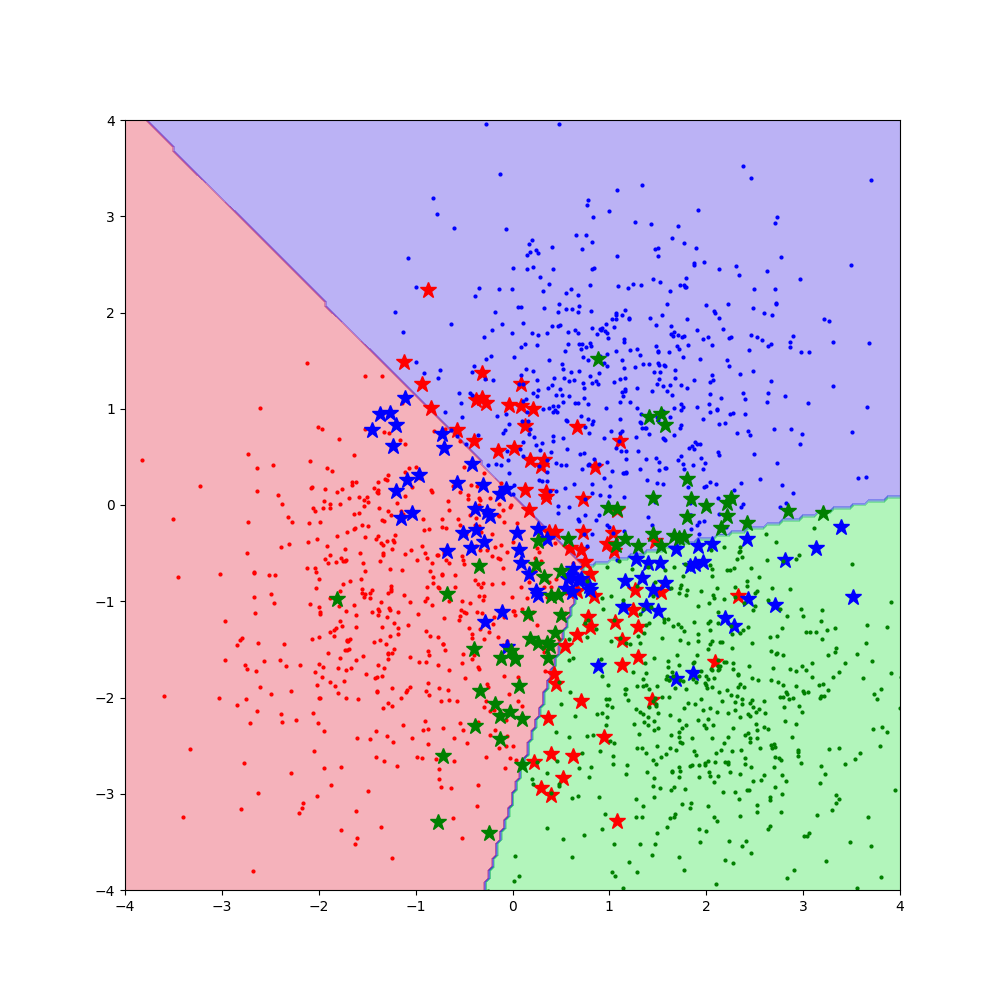

In [4]:
# Make 2D Plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xx, yy = np.meshgrid(np.linspace(-4, 4, 200), np.linspace(-4, 4, 200))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

conf = np.zeros([C, C, N], dtype=bool)
for i in range(C):
    for j in range(C):
        conf[i, j] = (y == i) & (yhat == j)
            
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))

ax.contourf(xx, yy, Z, cmap='red_blue_green_classes', alpha=0.3)
colors = ['r', 'b', 'g']
markers = ['o', '*', '^']
for i in range(C):
    for j in range(C):
        marker = 'o' if i== j else '*'
        markersize=2 if i== j else 12
        ax.plot(X[conf[i, j]][:, 0], X[conf[i, j]][:, 1], ls='', marker=marker, markersize=markersize, color=colors[i])